# This notebook implements the multivariate setup of Section 4.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense, Input
from keras import optimizers
from tqdm import tqdm_notebook as tqdm
from scipy.stats import random_correlation
#from pyitlib import discrete_random_variable as drv
import scipy.stats as stats
from entropy import *
from scipy.stats import multinomial, geom
from scipy.stats import poisson
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
import os


In [3]:
import sys
sys.path.insert(0, 'C:\\Users\\shale\\Dropbox\\PHD\\repos\\neute\\NPEET-master\\npeet')
import entropy_estimators as ee

# generating simulated data 

In [4]:
def rmse(lst, true_val):
    return (np.mean((np.array(lst) - true_val)**2))**0.5

In [5]:
def harmonic(n, alpha):
    a = 0
    for i in range(1, n):
        a += 1/i**alpha
        
    return a

In [6]:
length = 10000

In [7]:
# convert class to one hot 
def convert_to_one_hot(y, dict_size=None):
    if dict_size is None:
        dict_size = np.unique(y).shape[0]
    y_hot = np.eye(dict_size)[y.astype('int32')]
    return y_hot

def make_one_hot(y, dims, dict_size=None):
    y_hot = []
    for i in range(dims):
        y_hot.append(convert_to_one_hot(y[:, i], dict_size))
    return y_hot

#  model definition

In [8]:
# basic fc model with number of losses equales to dims - the dimensions of Y
def model_basic_classification(input_shape, class_size):
    l0 = Input(shape=input_shape, dtype = 'float32', name = 'input_l')
    X = Dense(units=50, kernel_initializer='random_uniform', name = 'l1')(l0)
    X = Dense(units=50, kernel_initializer='random_uniform', name = 'l2')(X)
    output = [Dense(class_size, activation='softmax')(X) for i in range(1) ]
    model = Model(input = [l0], outputs =  output )
    return model

# Estimating H(X)

In [9]:
def geom_dist(p, N, size, loc=0):
    x = np.arange(1, N+1, dtype='float')
    weights = p*(1-p)**(x-1)
    weights /= weights.sum()
    bounded_geom = stats.rv_discrete(name='bounded_geom', values=(x, weights))
    data = np.reshape(np.array(bounded_geom.rvs(size=size)), [-1, 1]) + loc
    return data, weights

In [10]:
def geom_entropy(weights):
    return -np.sum(weights*np.log(weights))

In [11]:
def zipf_dist(alpha, N, size):
    x = np.arange(1, N+1, dtype='float')
    weights = x ** (-alpha)
    weights /= weights.sum()
    bounded_zipf = stats.rv_discrete(name='bounded_zipf', values=(x, weights))
    data = np.reshape(np.array(bounded_zipf.rvs(size=size)), [-1, 1])
    return data

In [12]:
def zipf_entropy(alphabet, alpha):
    p = np.arange(1, alphabet, dtype='float')**(-alpha)
    c = harmonic(alphabet, alpha)
    H_zipf = -(1/c)*np.sum(p*np.log(p/c))
    return H_zipf

In [36]:
alphabet = 10**5
size=500
alpha = 1
p = 2/alphabet



for i in range(10):
    data_geom, _ = geom_dist(p, int(alphabet/2), int(size/2), loc=int(alphabet/2))
    data_zipf = zipf_dist(alpha=alpha, N=int(alphabet/2), size=int(size/2))
    data = np.vstack([data_geom, data_zipf])
    pd.DataFrame(data).to_csv('results/data_zipf_alpha_1_geo_500samples_alphabet_10_5/data_zipf_alpha_1_geo_500samples_alphabet_10_5_({}).csv'.format(i), index=False)

C:\Users\shale\Anaconda3\envs\tf_1_15\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  import sys


dim number 0
dim number 1
(1, 500, 2)


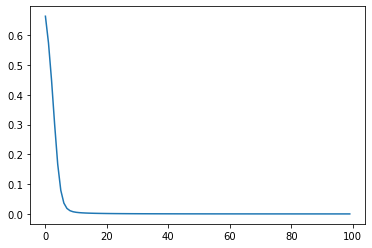

dim number 2
(1, 500, 2)


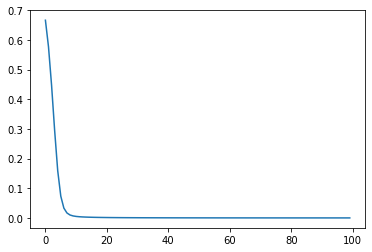

dim number 3
(1, 500, 2)


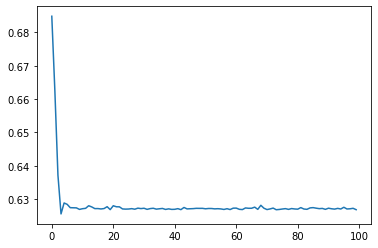

dim number 4
(1, 500, 2)


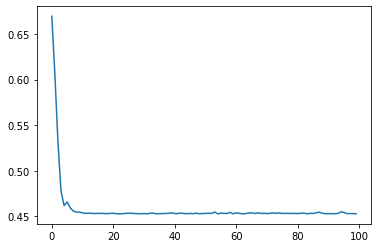

dim number 5
(1, 500, 2)


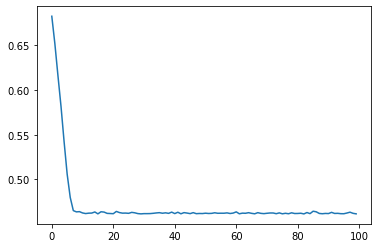

dim number 6
(1, 500, 2)


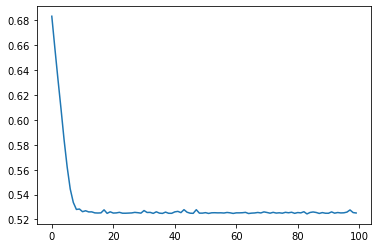

dim number 7
(1, 500, 2)


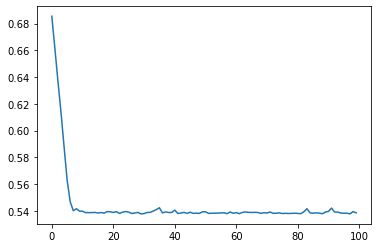

dim number 8
(1, 500, 2)


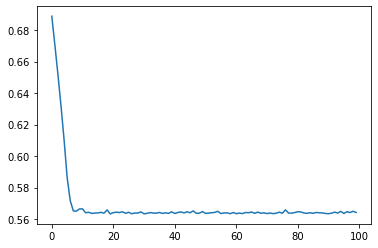

dim number 9
(1, 500, 2)


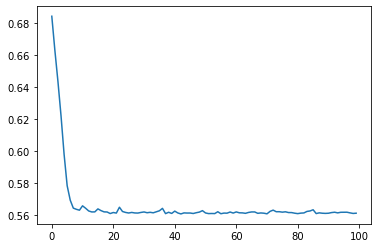

dim number 10
(1, 500, 2)


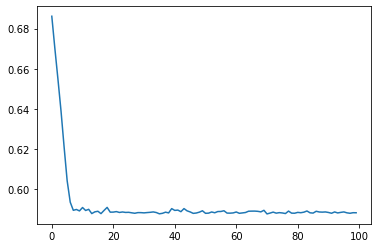

dim number 11
(1, 500, 2)


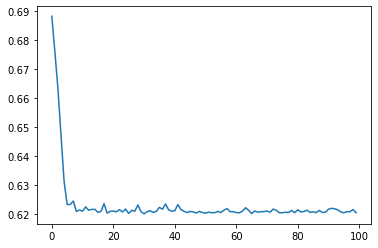

dim number 12
(1, 500, 2)


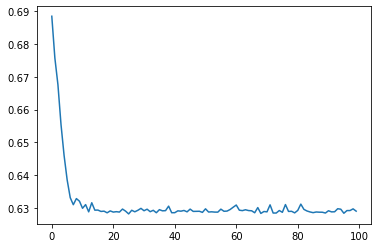

dim number 13
(1, 500, 2)


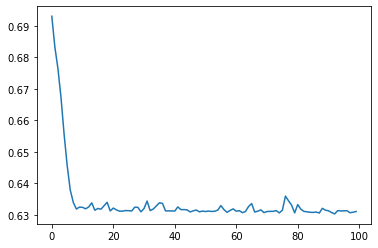

dim number 14
(1, 500, 2)


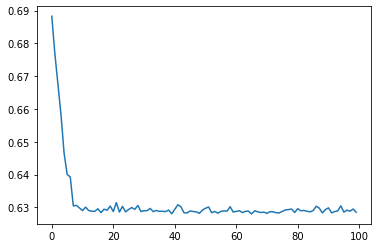

dim number 15
(1, 500, 2)


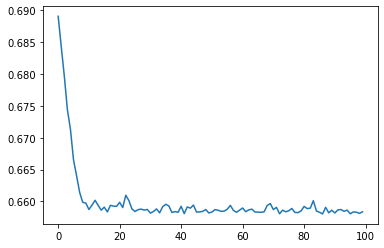

dim number 16
(1, 500, 2)


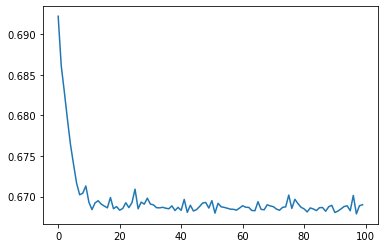

dim number 17
(1, 500, 2)


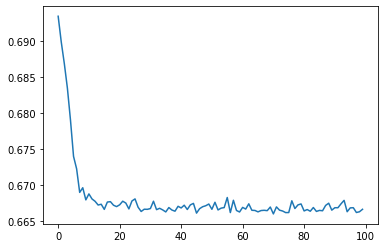

dim number 18
(1, 500, 2)


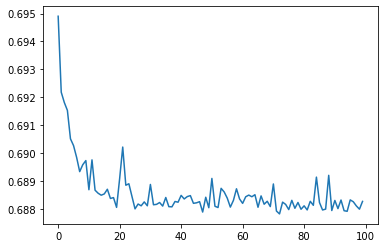

dim number 19
(1, 500, 2)


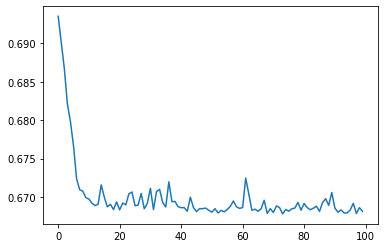

[10.17849541028935]
9.170989295978767


C:\Users\shale\Anaconda3\envs\tf_1_15\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  import sys


dim number 0
dim number 1
(1, 500, 2)


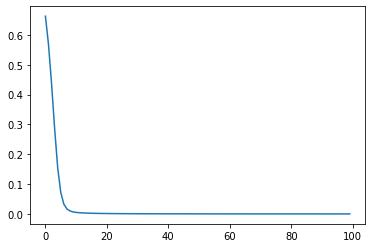

dim number 2
(1, 500, 2)


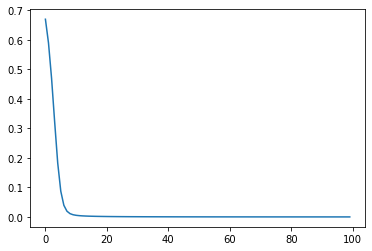

dim number 3
(1, 500, 2)


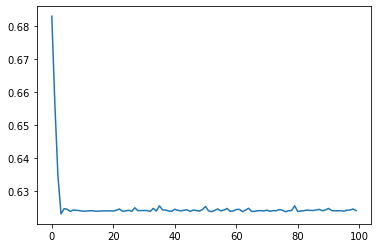

dim number 4
(1, 500, 2)


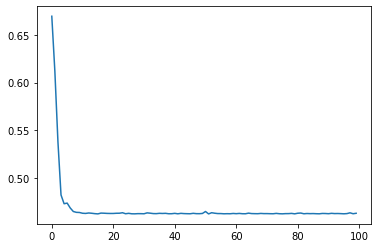

dim number 5
(1, 500, 2)


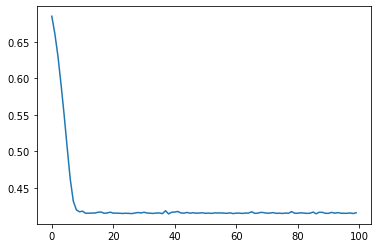

dim number 6
(1, 500, 2)


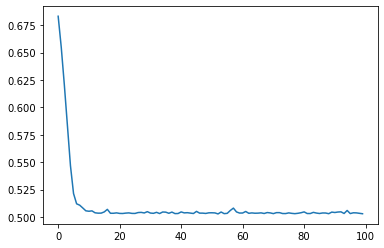

dim number 7
(1, 500, 2)


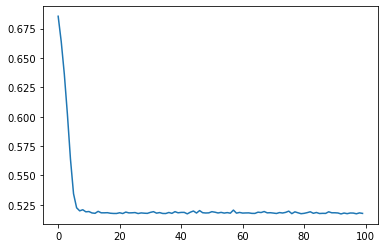

dim number 8
(1, 500, 2)


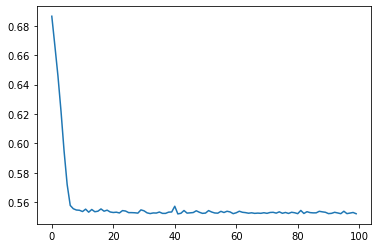

dim number 9
(1, 500, 2)


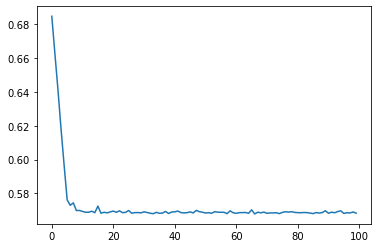

dim number 10
(1, 500, 2)


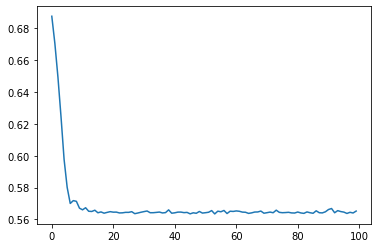

dim number 11
(1, 500, 2)


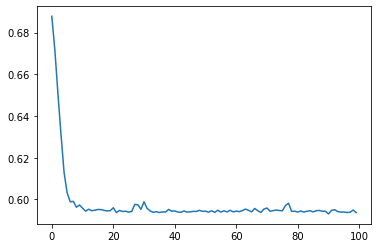

dim number 12
(1, 500, 2)


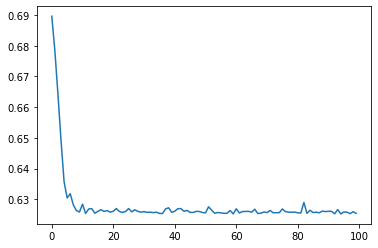

dim number 13
(1, 500, 2)


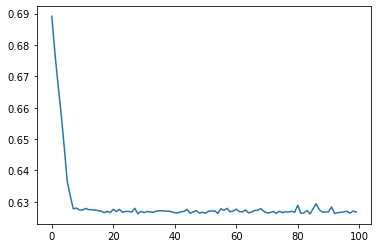

dim number 14
(1, 500, 2)


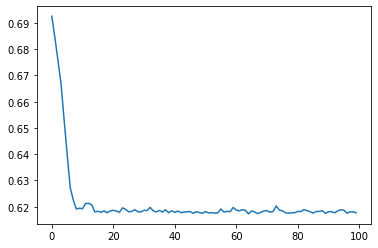

dim number 15
(1, 500, 2)


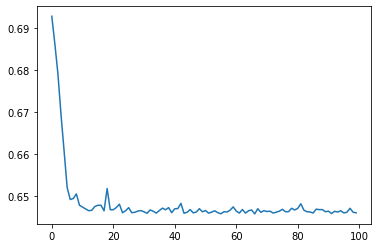

dim number 16
(1, 500, 2)


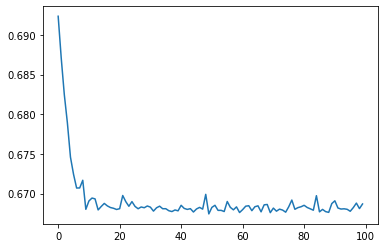

dim number 17
(1, 500, 2)


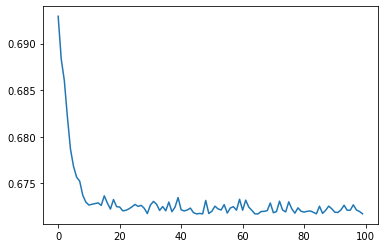

dim number 18
(1, 500, 2)


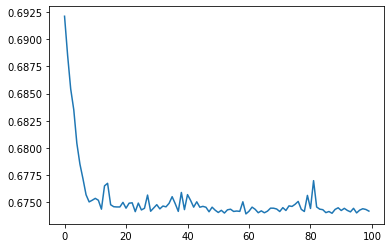

dim number 19
(1, 500, 2)


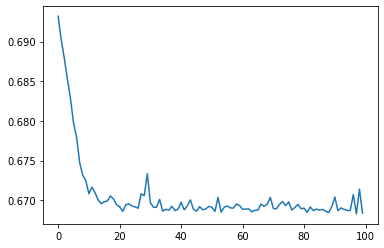

[10.17849541028935, 10.00189925319931]
9.170989295978767


C:\Users\shale\Anaconda3\envs\tf_1_15\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  import sys


dim number 0
dim number 1
(1, 500, 2)


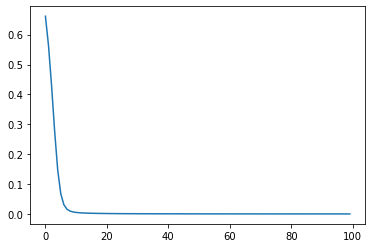

dim number 2
(1, 500, 2)


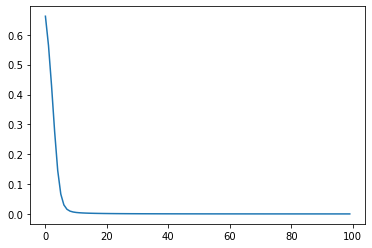

dim number 3
(1, 500, 2)


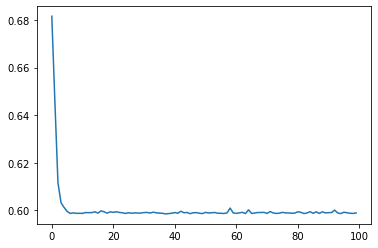

dim number 4
(1, 500, 2)


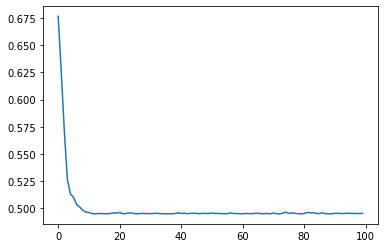

dim number 5
(1, 500, 2)


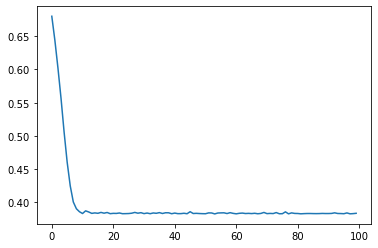

dim number 6
(1, 500, 2)


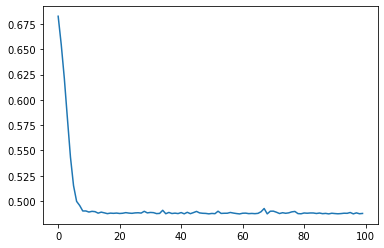

dim number 7
(1, 500, 2)


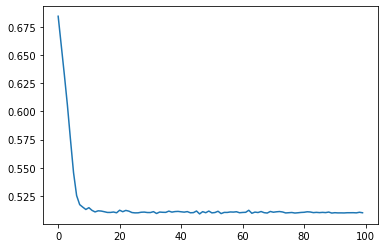

dim number 8
(1, 500, 2)


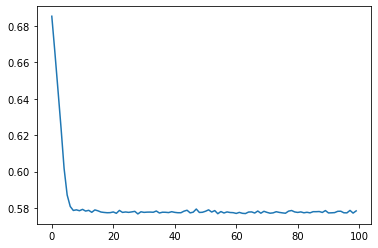

dim number 9
(1, 500, 2)


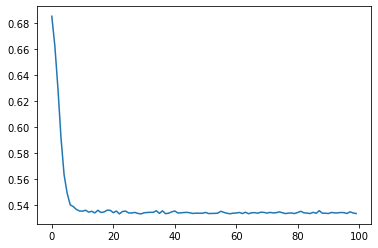

dim number 10
(1, 500, 2)


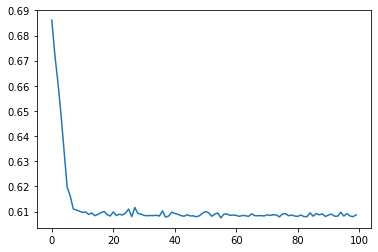

dim number 11
(1, 500, 2)


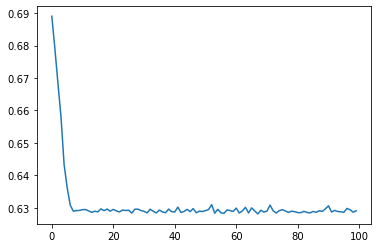

dim number 12
(1, 500, 2)


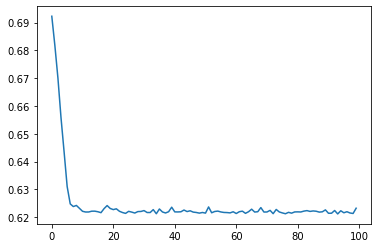

dim number 13
(1, 500, 2)


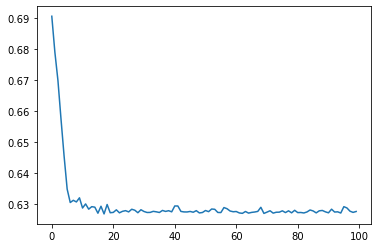

dim number 14
(1, 500, 2)


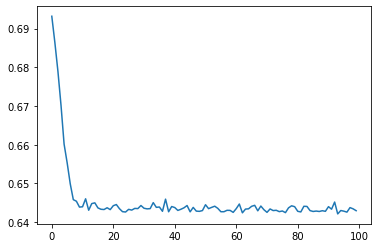

dim number 15
(1, 500, 2)


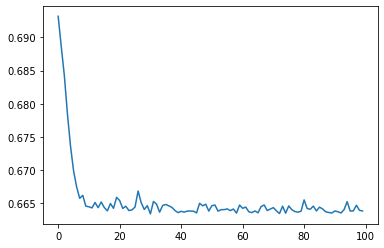

dim number 16
(1, 500, 2)


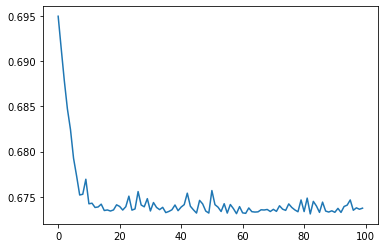

dim number 17
(1, 500, 2)


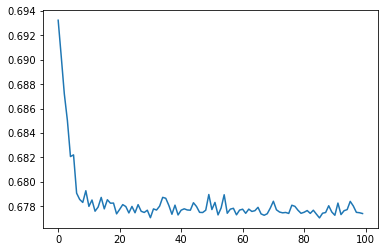

dim number 18
(1, 500, 2)


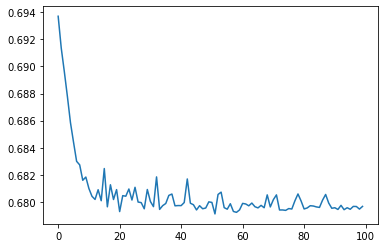

dim number 19
(1, 500, 2)


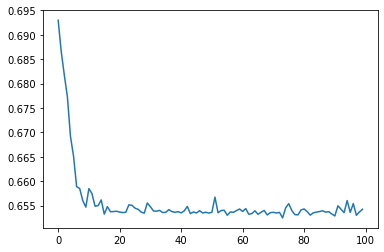

[10.17849541028935, 10.00189925319931, 10.067999275087173]
9.170989295978767


C:\Users\shale\Anaconda3\envs\tf_1_15\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  import sys


dim number 0
dim number 1
(1, 500, 2)


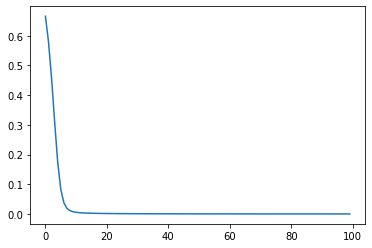

dim number 2
(1, 500, 2)


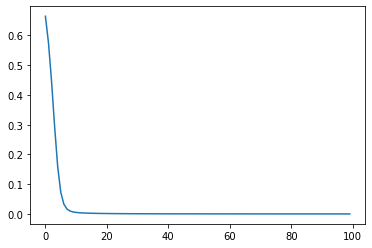

dim number 3
(1, 500, 2)


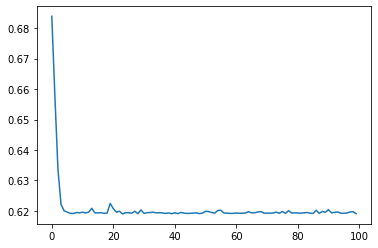

dim number 4
(1, 500, 2)


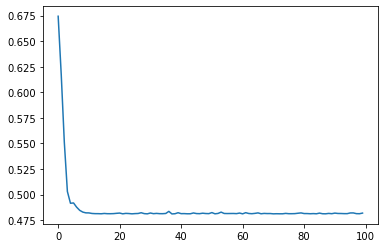

dim number 5
(1, 500, 2)


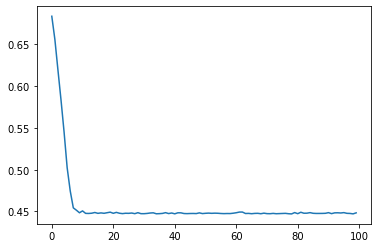

dim number 6
(1, 500, 2)


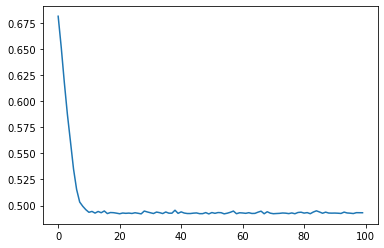

dim number 7
(1, 500, 2)


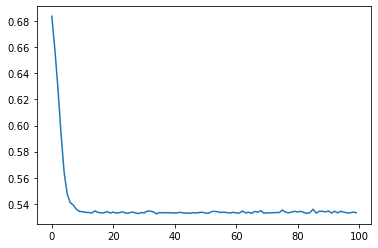

dim number 8
(1, 500, 2)


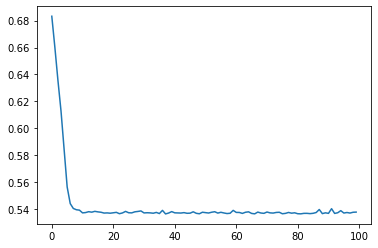

dim number 9
(1, 500, 2)


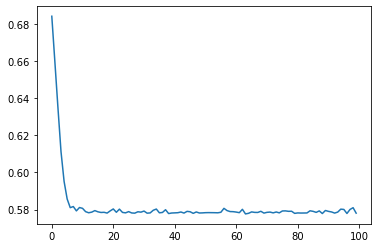

dim number 10
(1, 500, 2)


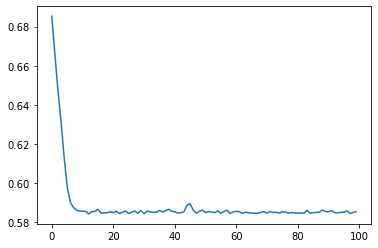

dim number 11
(1, 500, 2)


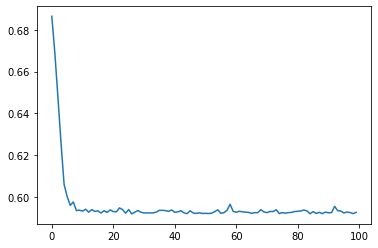

dim number 12
(1, 500, 2)


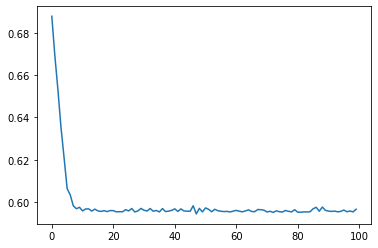

dim number 13
(1, 500, 2)


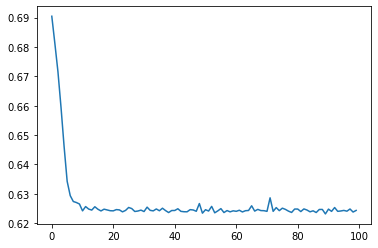

dim number 14
(1, 500, 2)


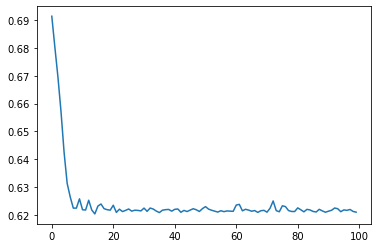

dim number 15
(1, 500, 2)


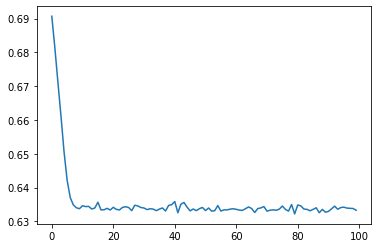

dim number 16
(1, 500, 2)


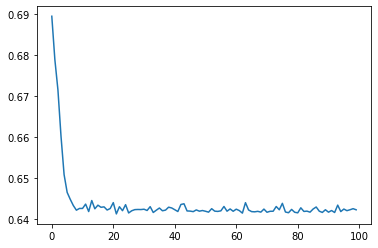

dim number 17
(1, 500, 2)


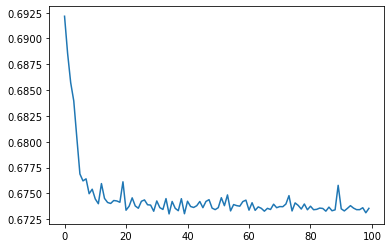

dim number 18
(1, 500, 2)


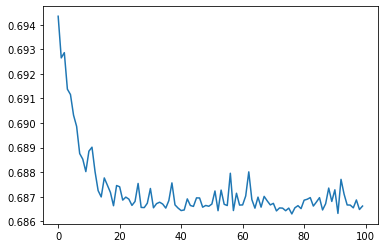

dim number 19
(1, 500, 2)


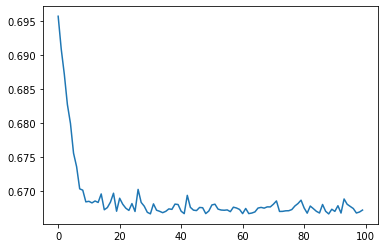

[10.17849541028935, 10.00189925319931, 10.067999275087173, 10.014502479488115]
9.170989295978767


C:\Users\shale\Anaconda3\envs\tf_1_15\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  import sys


dim number 0
dim number 1
(1, 500, 2)


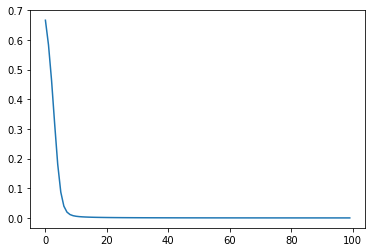

dim number 2
(1, 500, 2)


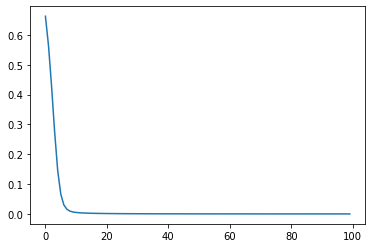

dim number 3
(1, 500, 2)


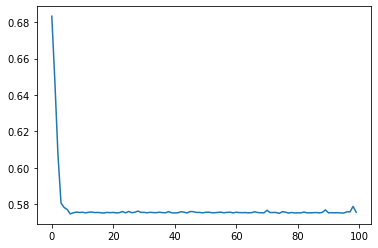

dim number 4
(1, 500, 2)


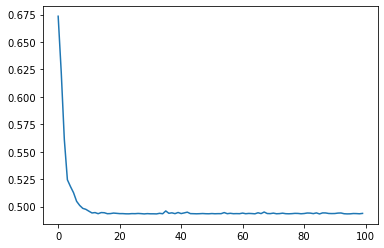

dim number 5
(1, 500, 2)


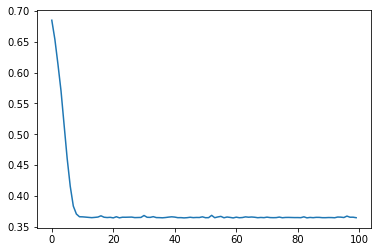

dim number 6
(1, 500, 2)


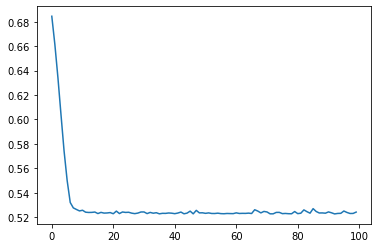

dim number 7
(1, 500, 2)


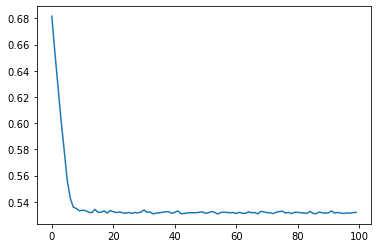

dim number 8
(1, 500, 2)


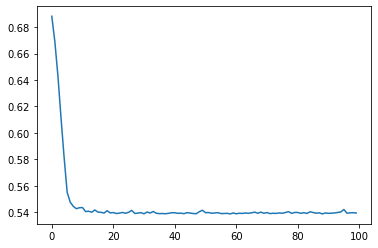

dim number 9
(1, 500, 2)


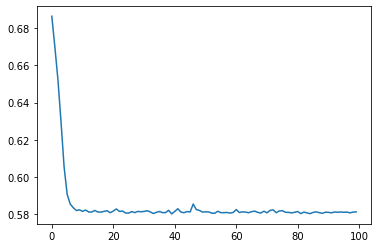

dim number 10
(1, 500, 2)


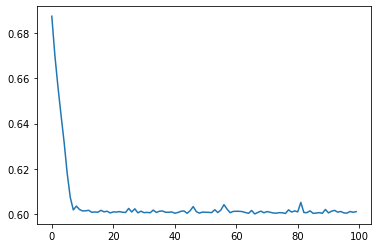

dim number 11
(1, 500, 2)


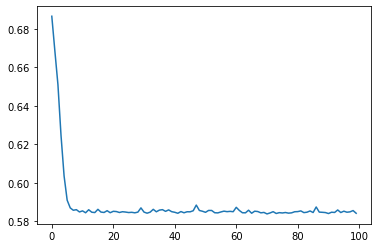

dim number 12
(1, 500, 2)


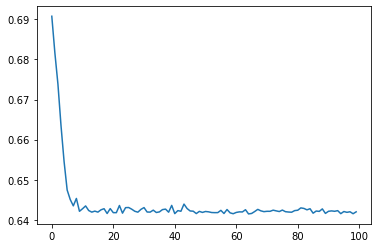

dim number 13
(1, 500, 2)


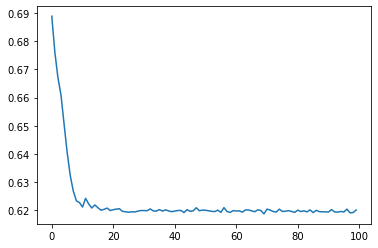

dim number 14
(1, 500, 2)


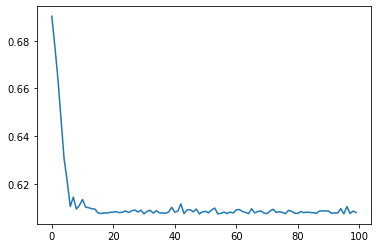

dim number 15
(1, 500, 2)


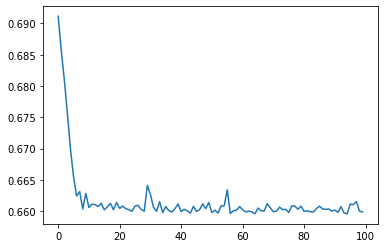

dim number 16
(1, 500, 2)


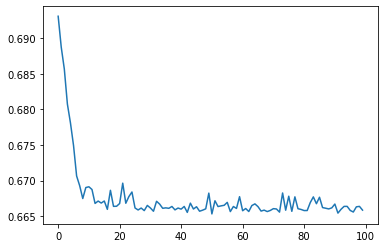

dim number 17
(1, 500, 2)


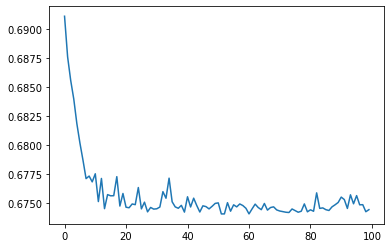

dim number 18
(1, 500, 2)


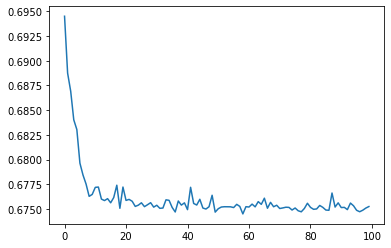

dim number 19
(1, 500, 2)


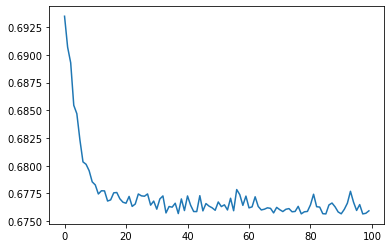

[10.17849541028935, 10.00189925319931, 10.067999275087173, 10.014502479488115, 10.017607723731572]
9.170989295978767


C:\Users\shale\Anaconda3\envs\tf_1_15\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  import sys


dim number 0
dim number 1
(1, 500, 2)


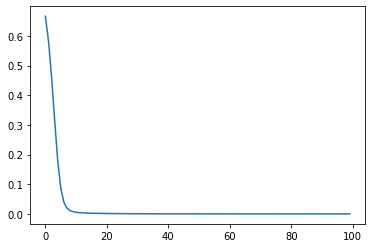

dim number 2
(1, 500, 2)


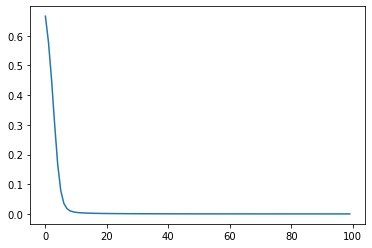

dim number 3
(1, 500, 2)


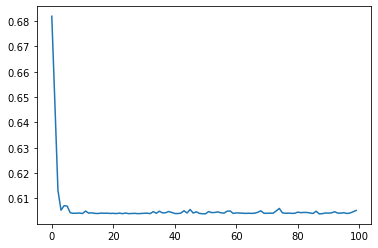

dim number 4
(1, 500, 2)


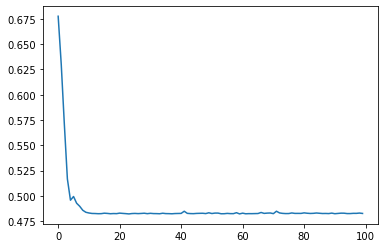

dim number 5
(1, 500, 2)


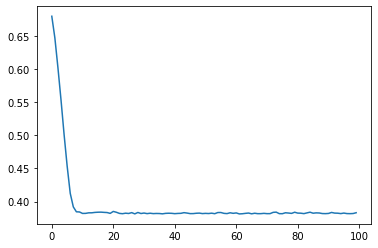

dim number 6
(1, 500, 2)


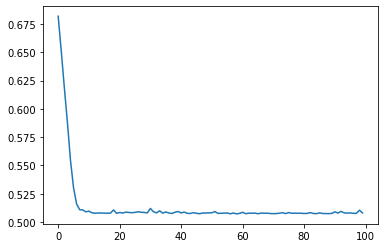

dim number 7
(1, 500, 2)


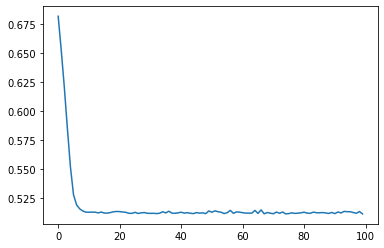

dim number 8
(1, 500, 2)


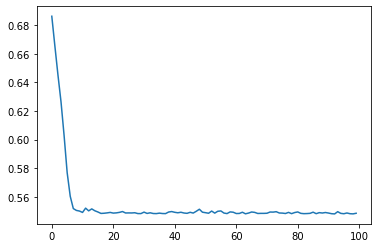

dim number 9
(1, 500, 2)


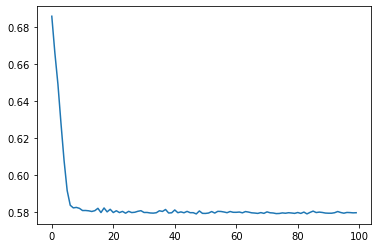

dim number 10
(1, 500, 2)


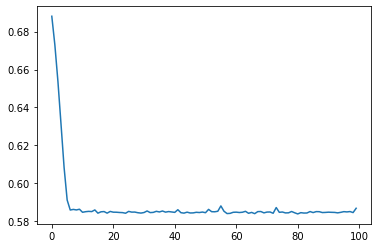

dim number 11
(1, 500, 2)


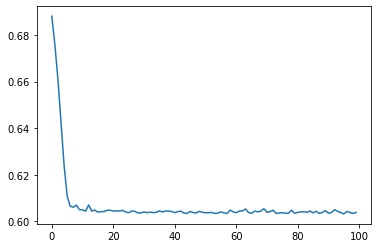

dim number 12
(1, 500, 2)


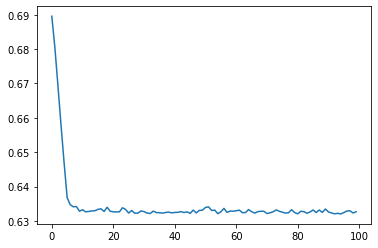

dim number 13
(1, 500, 2)


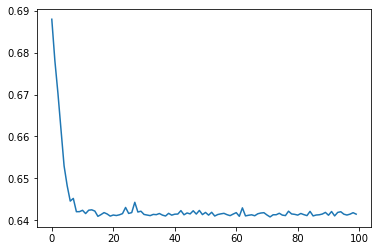

dim number 14
(1, 500, 2)


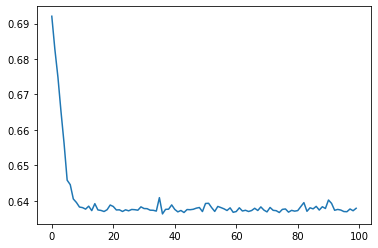

dim number 15
(1, 500, 2)


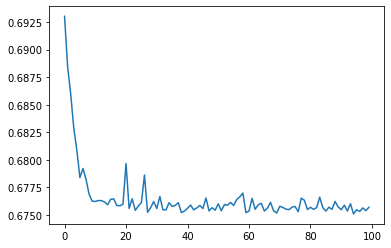

dim number 16
(1, 500, 2)


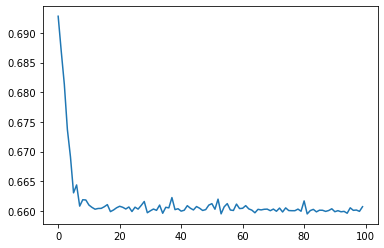

dim number 17
(1, 500, 2)


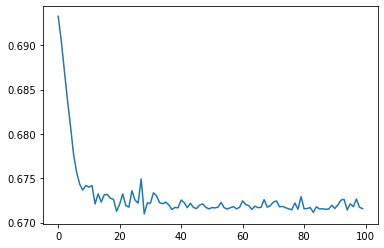

dim number 18
(1, 500, 2)


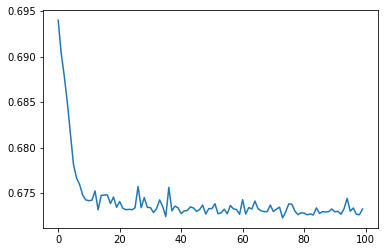

dim number 19
(1, 500, 2)


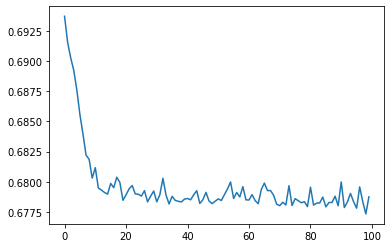

[10.17849541028935, 10.00189925319931, 10.067999275087173, 10.014502479488115, 10.017607723731572, 10.081884450279668]
9.170989295978767


C:\Users\shale\Anaconda3\envs\tf_1_15\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  import sys


dim number 0
dim number 1
(1, 500, 2)


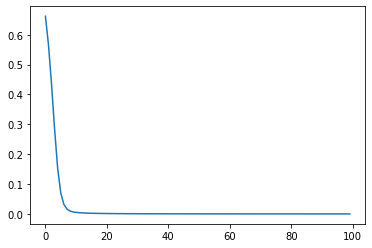

dim number 2
(1, 500, 2)


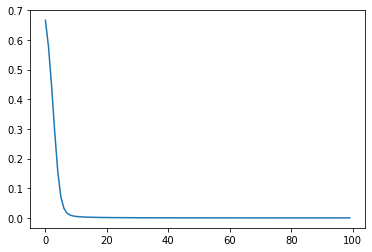

dim number 3
(1, 500, 2)


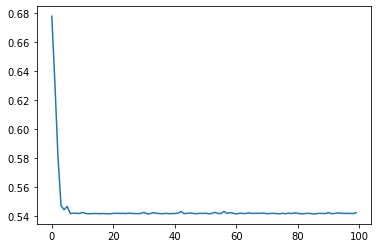

dim number 4
(1, 500, 2)


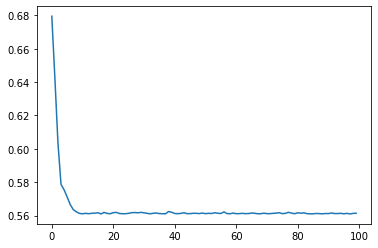

dim number 5
(1, 500, 2)


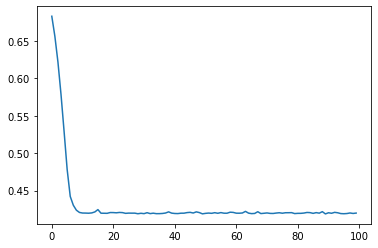

dim number 6
(1, 500, 2)


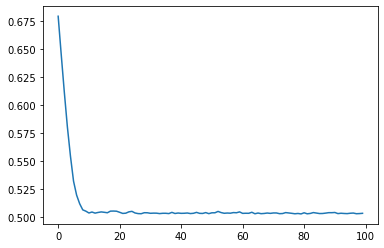

dim number 7
(1, 500, 2)


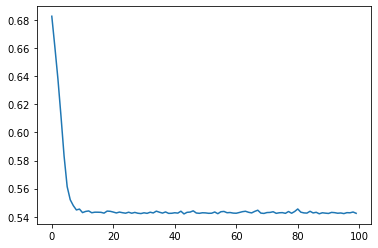

dim number 8
(1, 500, 2)


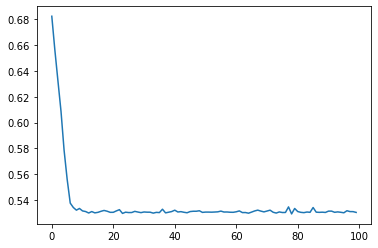

dim number 9
(1, 500, 2)


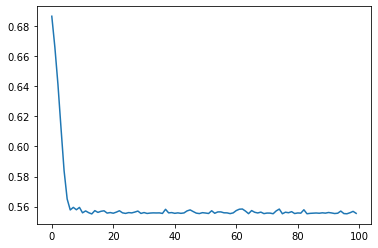

dim number 10
(1, 500, 2)


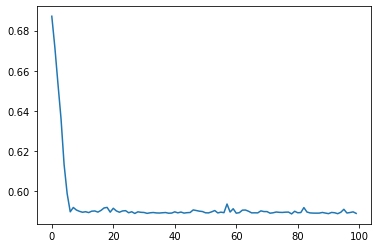

dim number 11
(1, 500, 2)


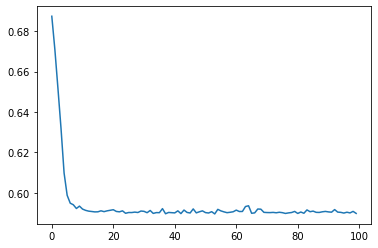

dim number 12
(1, 500, 2)


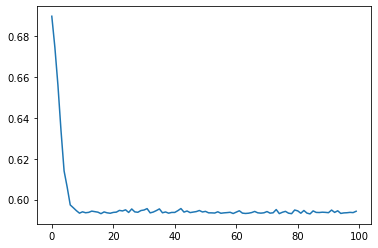

dim number 13
(1, 500, 2)


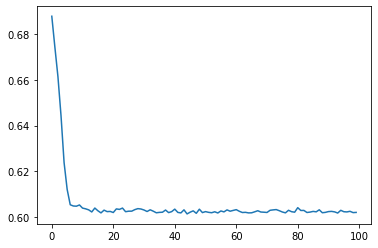

dim number 14
(1, 500, 2)


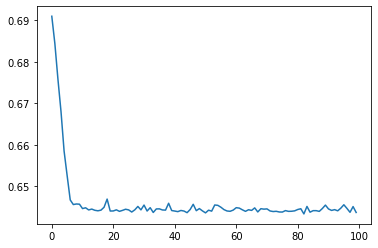

dim number 15
(1, 500, 2)


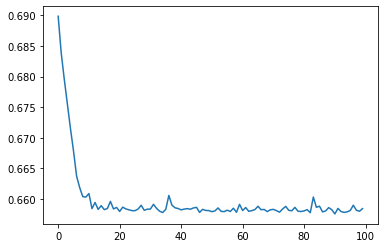

dim number 16
(1, 500, 2)


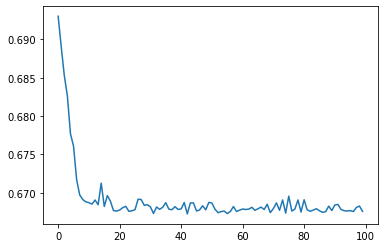

dim number 17
(1, 500, 2)


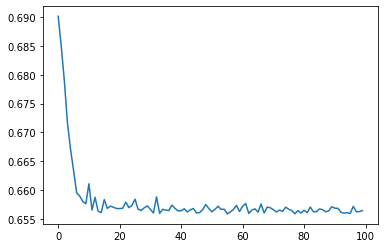

dim number 18
(1, 500, 2)


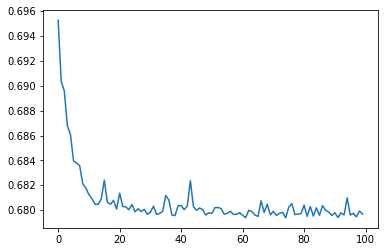

dim number 19
(1, 500, 2)


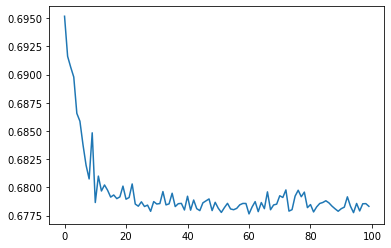

[10.17849541028935, 10.00189925319931, 10.067999275087173, 10.014502479488115, 10.017607723731572, 10.081884450279668, 10.01530987913956]
9.170989295978767


C:\Users\shale\Anaconda3\envs\tf_1_15\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  import sys


dim number 0
dim number 1
(1, 500, 2)


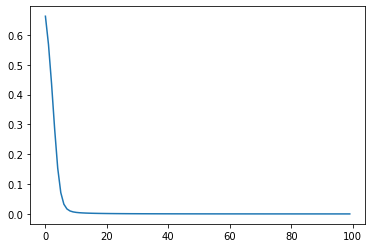

dim number 2
(1, 500, 2)


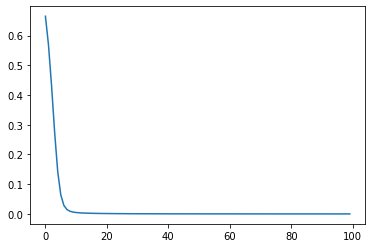

dim number 3
(1, 500, 2)


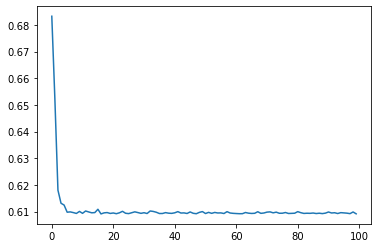

dim number 4
(1, 500, 2)


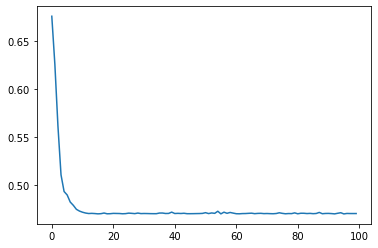

dim number 5
(1, 500, 2)


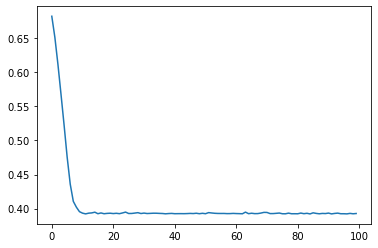

dim number 6
(1, 500, 2)


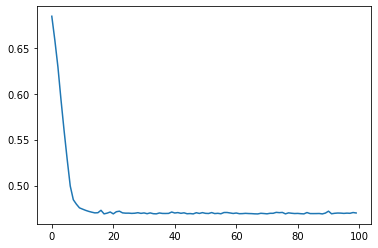

dim number 7
(1, 500, 2)


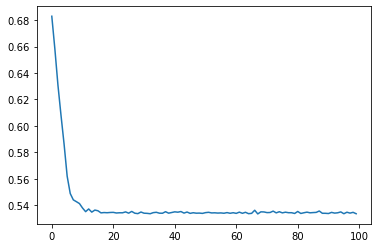

dim number 8
(1, 500, 2)


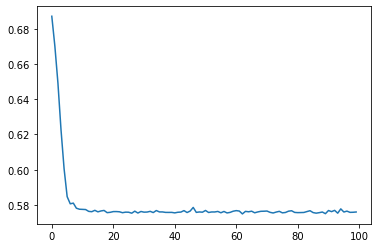

dim number 9
(1, 500, 2)


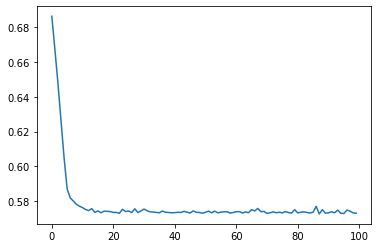

dim number 10
(1, 500, 2)


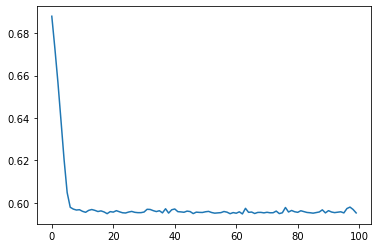

dim number 11
(1, 500, 2)


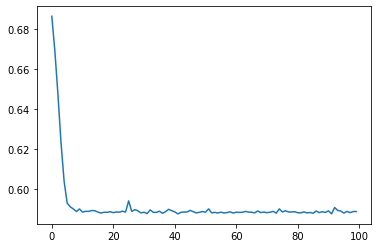

dim number 12
(1, 500, 2)


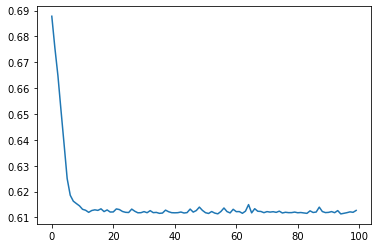

dim number 13
(1, 500, 2)


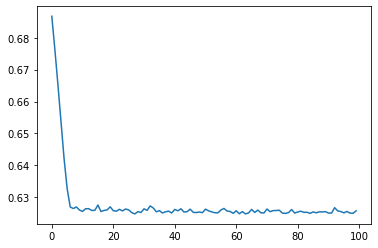

dim number 14
(1, 500, 2)


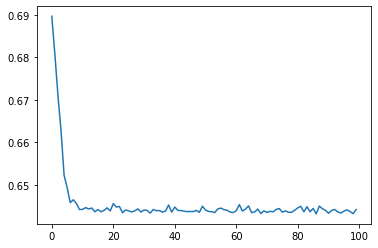

dim number 15
(1, 500, 2)


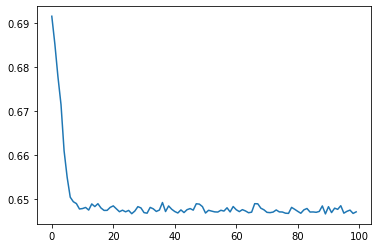

dim number 16
(1, 500, 2)


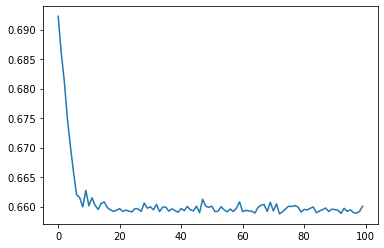

dim number 17
(1, 500, 2)


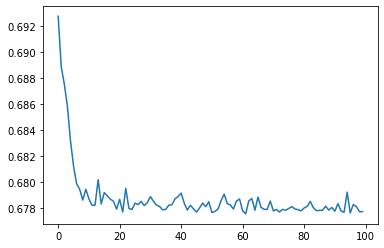

dim number 18
(1, 500, 2)


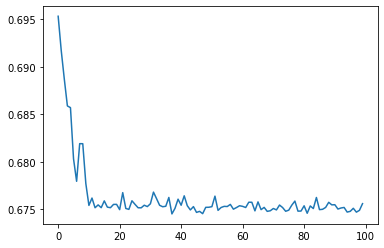

dim number 19
(1, 500, 2)


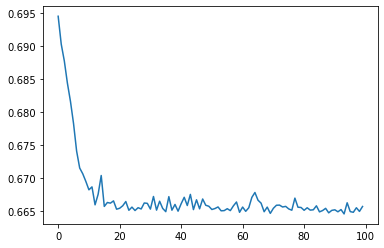

[10.17849541028935, 10.00189925319931, 10.067999275087173, 10.014502479488115, 10.017607723731572, 10.081884450279668, 10.01530987913956, 10.018832159888957]
9.170989295978767


C:\Users\shale\Anaconda3\envs\tf_1_15\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  import sys


dim number 0
dim number 1
(1, 500, 2)


KeyboardInterrupt: 

In [37]:
# run 2000 epochs for every rho/MI value ###poisson###m
epochs = 100
batch_size = 64
bins = 2
length = 1000
dims = 20
sub_loss_lst = []
H_y_lst = [ [] for _ in range(dims)]
H_y_total = []
results = []
H_mle = []
H_mm = []
H_sota = []
alphabet = 10**5
n = np.repeat(length, 10)
p = 2/alphabet
alpha = 1

_, w = geom_dist(p, int(alphabet/2), length)


H_true = 0.5*(geom_entropy(w) + zipf_entropy(alpha=alpha, alphabet=int(alphabet/2)))



path = 'C:/Users/shale/Dropbox/PHD/repos/neute/second_version/results/data_zipf_alpha_1_geo_500samples_alphabet_10_5'


for k, size in enumerate(n):    
    
    H_y_lst = [ [] for _ in range(dims)]
    data = pd.read_csv(os.path.join(path, 'data_zipf_alpha_1_geo_500samples_alphabet_10_5_({}).csv'.format(k)))
    data = np.array(data)

    entropy = Entropy(k=int(alphabet))
    fins = sample_to_fin(np.reshape(data, [-1]).tolist())
    H_sota.append(entropy.estimate(fins)*np.log(2))
    H_mm.append(entropy.estimate_Miller_Madow(fins)*np.log(2))
    H_mle.append(entropy.estimate_plug(fins)*np.log(2))
    
    vf = np.vectorize(np.binary_repr)
    data = vf(data, width=dims)
    lst = []
    for i in data:
        lst.append([int(j) for j in i[0]])

    data = np.array(lst)
    model_lst = []
    opt_lst = []
    for m in range(0, dims):
        if m == 0:
            model_lst.append(None)
        else:
            model_lst.append(model_basic_classification([m], bins))

    for m in range(0, dims):
        if m == 0:
            opt_lst.append(None)
        else:
            opt_lst.append(optimizers.Adam())

    for m in range (1, dims):
        model_lst[m].compile(loss='categorical_crossentropy', optimizer=opt_lst[m], metrics=['accuracy'])
    
    for j in range(0, dims):
        print('dim number', j)
        if j != 0:
            x = data[:, range(j)]
            y = data[:, j]
            y = np.reshape(y, [-1, 1])
            y_hot = make_one_hot(y, 1, bins)
            print(np.array(y_hot).shape)
            hist = model_lst[j].fit(x, y_hot, epochs=epochs, batch_size=batch_size, validation_split=0, verbose=0, shuffle=True)
            H_y_lst[j].append(hist.history['loss'])
            plt.plot(hist.history['loss'])
            plt.show()
        else:
            y = data[:, j]
            p_1 = (np.sum(y)+10**-5)/float(size)
        
            H_y_lst[j].append([np.sum(np.array([p_1, 1-p_1] )*np.log([p_1, 1-p_1]))]*epochs)

    H_y_total.append(np.reshape(np.sum(H_y_lst, axis=0), [-1]))
    results.append(np.reshape(H_y_total, [-1])[-1])
    print(results)
    print(H_true)
    


In [38]:
total_results = pd.DataFrame([results, H_mm, H_mle, H_sota,np.repeat(H_true, len(n))]).transpose()
total_results.columns = ['CE', 'MM', 'Plug', 'polynomial', 'True']

In [39]:
total_results

,CE,MM,Plug,polynomial,True
0,10.178495,6.326272,5.894272,13.294692,9.170989
1,10.001899,6.209551,5.797551,13.064482,9.170989
2,10.067999,6.325727,5.897727,13.201477,9.170989
3,10.014502,6.204139,5.789139,13.085248,9.170989
4,10.017608,6.266765,5.841765,13.261156,9.170989
5,10.081884,6.227000,5.809000,13.126134,9.170989
6,10.015310,6.211363,5.795363,13.126767,9.170989
7,10.018832,6.266521,5.846521,13.123609,9.170989
8,NaN,6.423391,5.980391,13.389120,9.170989
9,NaN,NaN,NaN,NaN,9.170989


In [40]:
rmse_results = total_results.iloc[:8, :].apply(lambda x: rmse(x, total_results.iloc[0, -1]), axis=0)

In [41]:
0.880329

CE            0.880329
MM            2.916701
Plug          3.337323
polynomial    3.990214
True          0.000000
dtype: float64

total_results.to_pickle('results/H_zipf_alpha_1_1000samples_n_3_alphabet_10_7.pkl')

In [42]:
total_results.to_pickle('results/R_results/data_zipf_alpha_1_geo_500samples_alphabet_10_5.pkl')